## Data visualization

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('retail_store_sales_cleaned_feature_engineering.csv')
df.head()

In [ ]:
def restore_discount(row):
    if row['Disc_True'] == 1:
        return 'True'
    elif row['Disc_Unknown'] == 1:
        return 'Unknown'
    else:
        return 'False' 

df['Has_Discount'] = df.apply(restore_discount, axis=1)

In [5]:
df = df.drop(columns=['Disc_True', 'Disc_Unknown'])

In [34]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Transaction Date,Year,Month,Day,Is_Weekend,Is_Holiday,Is_NonWorkday,Prev_Date_Cust,Recency_Cust,PM_Credit Card,PM_Digital Wallet,Loc_Online,Has_Discount
0,TXN_6950467,CUST_01,Computers and electric accessories,Item_6_CEA,12.5,6.0,75.0,2022-01-01,2022,1,1,True,True,True,NaN,0,0,1,0,True
1,TXN_9662767,CUST_01,Beverages,Item_20_BEV,33.5,9.0,301.5,2022-01-02,2022,1,2,True,False,True,2022-01-01,1,1,0,0,True
2,TXN_5044628,CUST_01,Butchers,Item_25_BUT,41.0,9.0,369.0,2022-01-07,2022,1,7,False,False,False,2022-01-02,5,0,1,0,Unknown
3,TXN_9131959,CUST_01,Milk Products,Item_2_MILK,6.5,1.0,6.5,2022-01-11,2022,1,11,False,False,False,2022-01-07,4,1,0,1,False
4,TXN_9753172,CUST_01,Computers and electric accessories,Item_9_CEA,17.0,9.0,153.0,2022-01-12,2022,1,12,False,False,False,2022-01-11,1,0,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_8216096,CUST_25,Electric household essentials,Item_21_EHE,35.0,1.0,35.0,2025-01-06,2025,1,6,False,False,False,2025-01-04,2,0,0,0,False
12571,TXN_6314774,CUST_25,Milk Products,Item_23_MILK,38.0,8.0,304.0,2025-01-08,2025,1,8,False,False,False,2025-01-06,2,1,0,1,Unknown
12572,TXN_4454614,CUST_25,Patisserie,Item_10_PAT,18.5,1.0,18.5,2025-01-13,2025,1,13,False,False,False,2025-01-08,5,1,0,0,True
12573,TXN_2596812,CUST_25,Patisserie,Item_2_PAT,6.5,8.0,52.0,2025-01-17,2025,1,17,False,False,False,2025-01-13,4,0,0,1,Unknown


----


### 數值類型視覺化並描述性統計

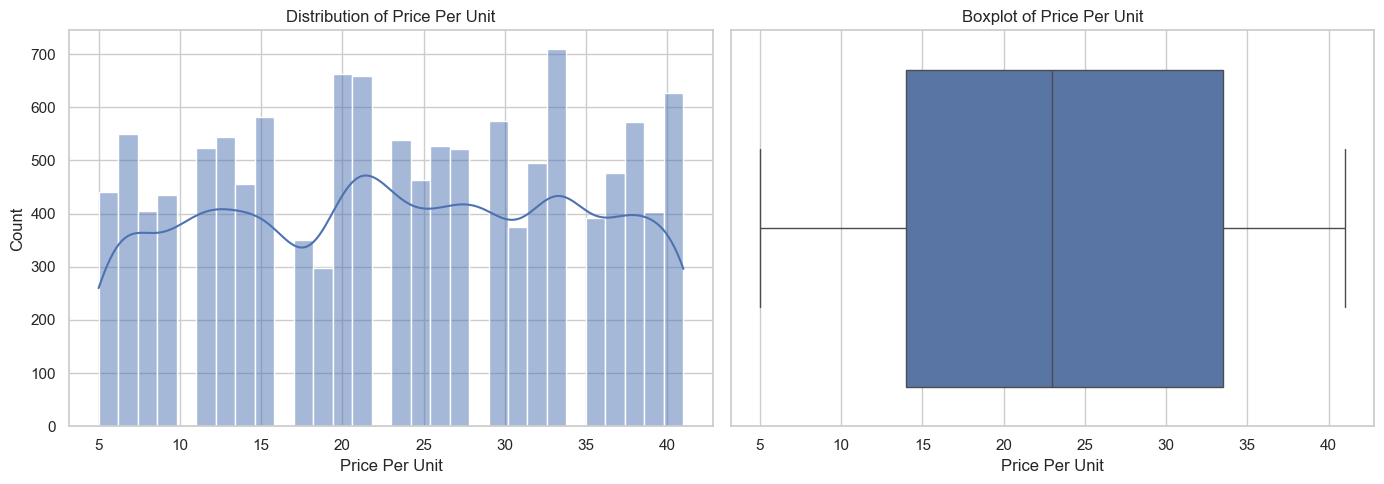

📊 Descriptive stats for: Price Per Unit
count    12575.000000
mean        23.369304
std         10.748728
min          5.000000
25%         14.000000
50%         23.000000
75%         33.500000
max         41.000000
Name: Price Per Unit, dtype: float64
Skewness: -0.03
Kurtosis: -1.17


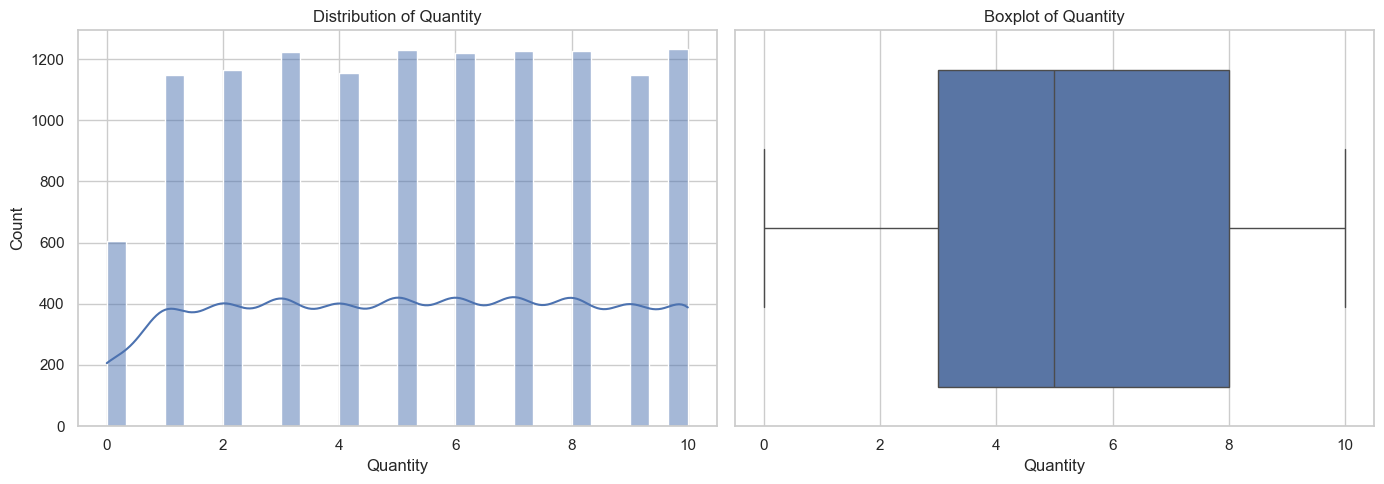

📊 Descriptive stats for: Quantity
count    12575.000000
mean         5.270457
std          3.029325
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: Quantity, dtype: float64
Skewness: -0.04
Kurtosis: -1.17


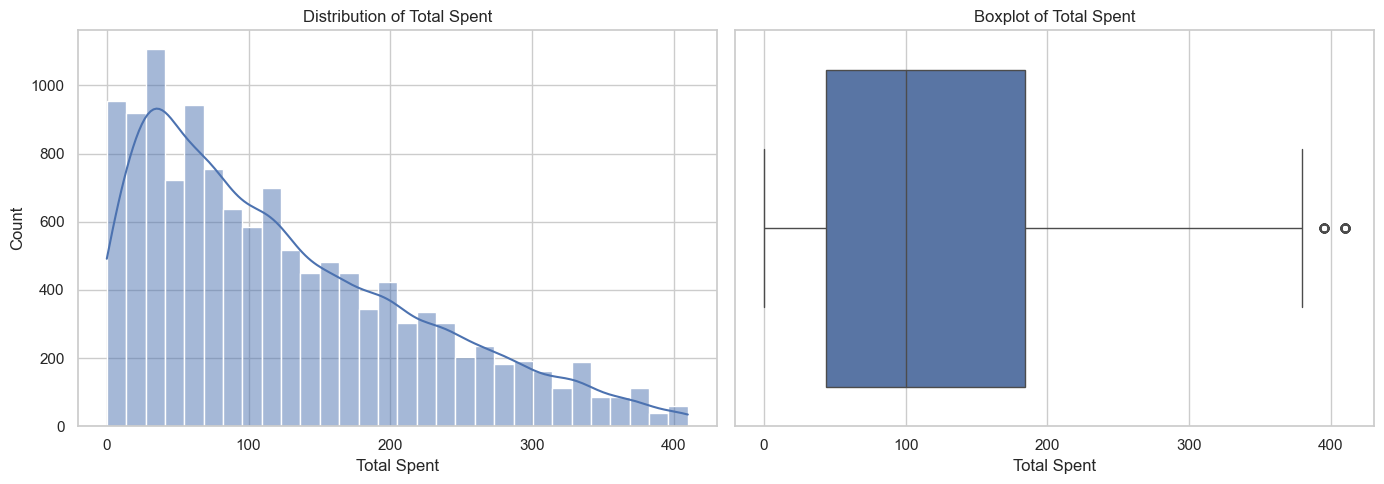

📊 Descriptive stats for: Total Spent
count    12575.000000
mean       123.425129
std         96.514921
min          0.000000
25%         43.500000
50%        100.000000
75%        184.000000
max        410.000000
Name: Total Spent, dtype: float64
Skewness: 0.83
Kurtosis: -0.10


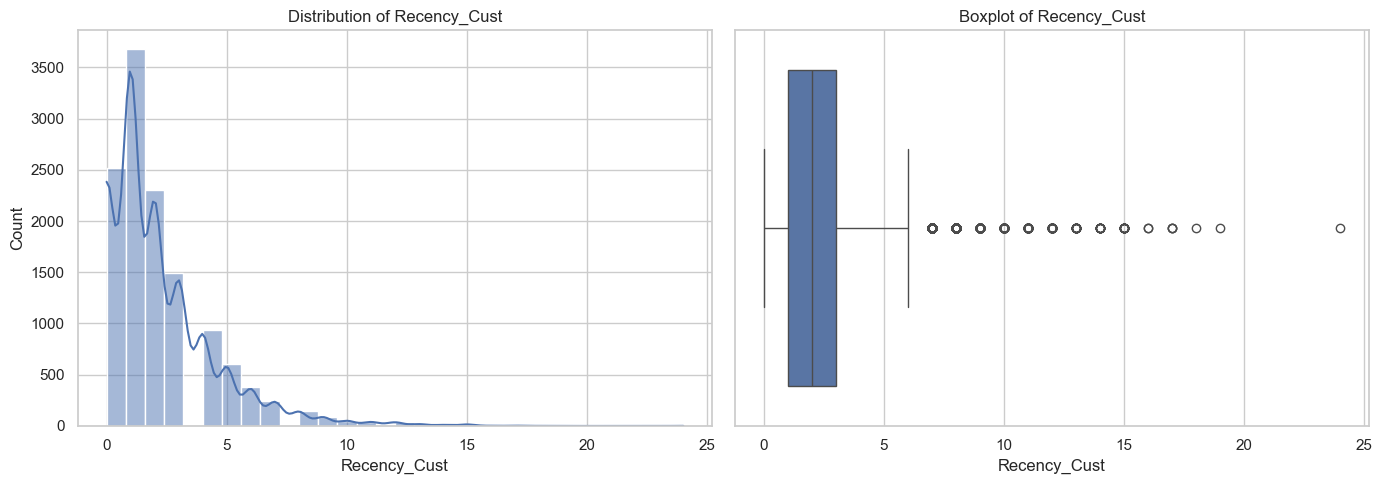

📊 Descriptive stats for: Recency_Cust
count    12575.000000
mean         2.205726
std          2.274938
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: Recency_Cust, dtype: float64
Skewness: 1.95
Kurtosis: 5.78


In [ ]:
sns.set(style="whitegrid")

# 數值欄位列表
numeric_cols = ['Price Per Unit', 'Quantity', 'Total Spent', 'Recency_Cust']

for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

    print(f"📊 Descriptive stats for: {col}")
    print(df[col].describe())
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")
    print("="*50)


### ① **Price Per Unit（單位價格）**

* 📊 分佈：整體呈現比較平坦的多峰分布，價格分布廣泛，從 5 到 41。
* 📦 Boxplot：大致對稱，沒有明顯離群點。
* 📈 描述統計：

  * 平均值 ≈ 23.4，標準差 ≈ 10.7
  * 偏態（Skewness）≈ -0.03 → 接近對稱
  * 峰度（Kurtosis）≈ -1.17 → 分布較扁平

**🔍 推論：**

* 價格分佈是均勻且多樣的，商品種類可能非常多樣。
* 沒有特別集中於某個價格點，也幾乎沒有極端價格。
* 適合用來分析「價格區間與購買行為」之間的關聯。

---

### ② **Quantity（購買數量）**

* 📊 分佈：偏向高頻購買少量（如 1～5），0 和 10 兩端略為突出。
* 📦 Boxplot：整體集中，無離群值。
* 📈 描述統計：

  * 平均 ≈ 5.27，標準差 ≈ 3.03
  * 偏態 ≈ -0.04（近似對稱）
  * 峰度 ≈ -1.17 → 也比較扁平

**🔍 推論：**

* 顧客常見的購買數量為 5 件左右。
* 數量分布比較「規律」且偏離不大，顧客行為相對一致。
* 可以做類似：數量 vs 折扣/價格 的分析，是否大宗會有價格優惠。

---

### ③ **Total Spent（總消費金額）**

* 📊 分佈：偏態明顯（右偏），多數集中在 100 以下，但存在不少高金額消費。
* 📦 Boxplot：右尾長，有明顯離群值。
* 📈 描述統計：

  * 平均 ≈ 123.4，但中位數 ≈ 100 → 右偏
  * 偏態 ≈ 0.83（正偏）
  * 峰度 ≈ -0.10（接近平坦）

**🔍 推論：**

* 少數高消費金額拉高了整體平均。
* 分析時應使用中位數輔助判斷（而非只看平均）。
* 可針對離群顧客做分群分析（例如 VIP 客群）。

---

### ④ **Recency\_Cust（顧客回購天數）**

* 📊 分佈：極度偏左，大部分顧客在 0～3 天內又來購買。
* 📦 Boxplot：分佈非常緊湊，有明顯右尾離群點。
* 📈 描述統計：

  * 平均 ≈ 2.2 天，偏態 ≈ 1.95（強烈正偏）
  * 峰度 ≈ 5.78 → 尖峰型分布

**🔍 推論：**

* 多數顧客是**高頻回購**，顯示出良好的顧客黏性。
* 有少數回購間隔時間長的顧客，可作為流失預警指標。
* 適合導入 RFM 模型來做顧客分群（Recency 是 RFM 的一環）。

---


### 產品類別分析

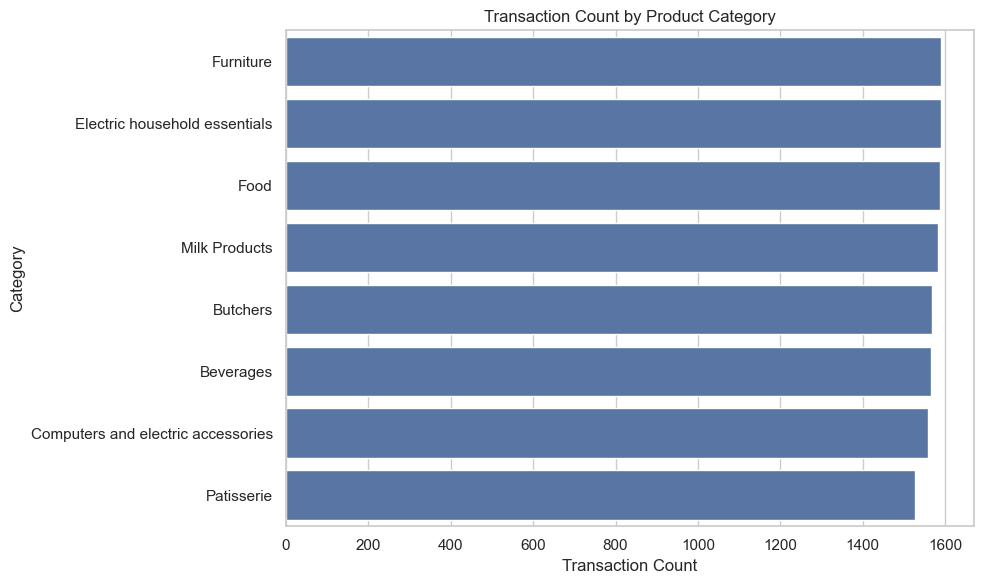

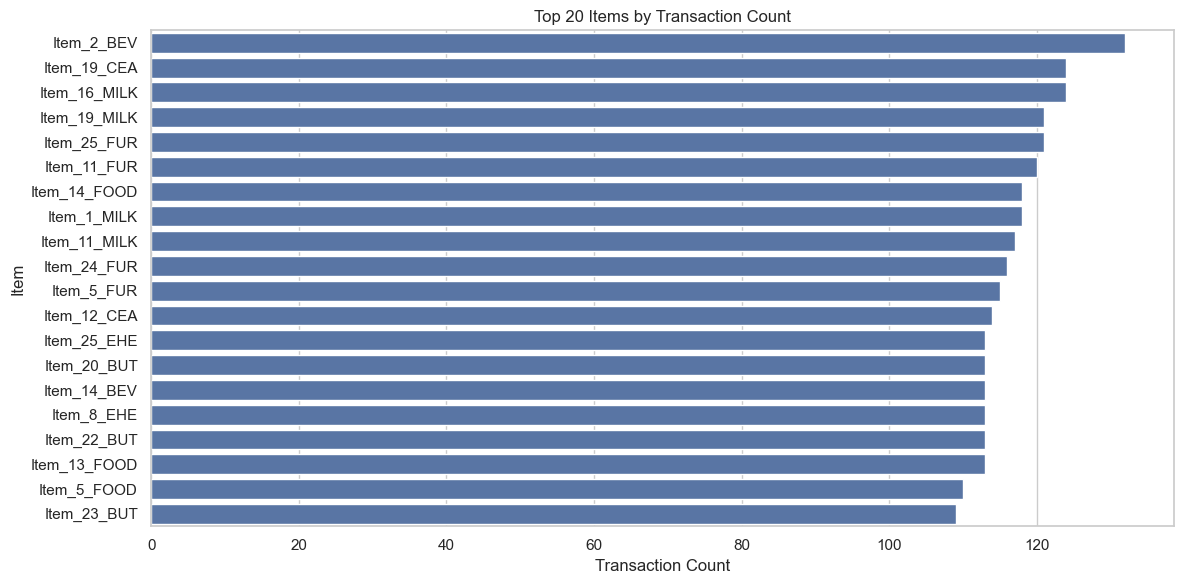

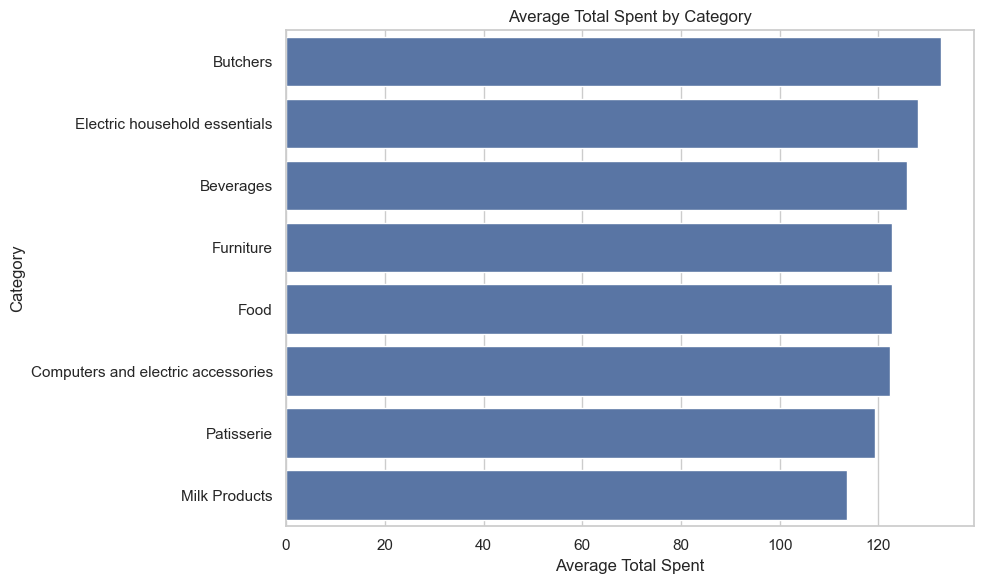

In [ ]:
`    sns.set(style="whitegrid")

    # 👉 商品類別分佈
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
    plt.title('Transaction Count by Product Category')
    plt.xlabel('Transaction Count')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()

    # 👉 熱銷商品排行（依交易次數）
    top_items = df['Item'].value_counts().nlargest(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_items.values, y=top_items.index)
    plt.title('Top 20 Items by Transaction Count')
    plt.xlabel('Transaction Count')
    plt.ylabel('Item')
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 6))
    avg_spent = df.groupby('Category')['Total Spent'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_spent.values, y=avg_spent.index)
    plt.title('Average Total Spent by Category')
    plt.xlabel('Average Total Spent')
    plt.ylabel('Category')
    plt.tight_layout()
    plt.show()`

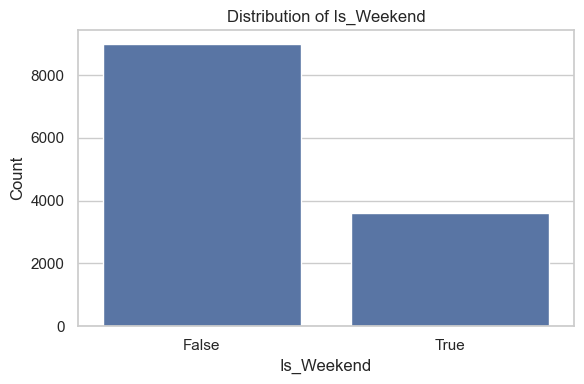

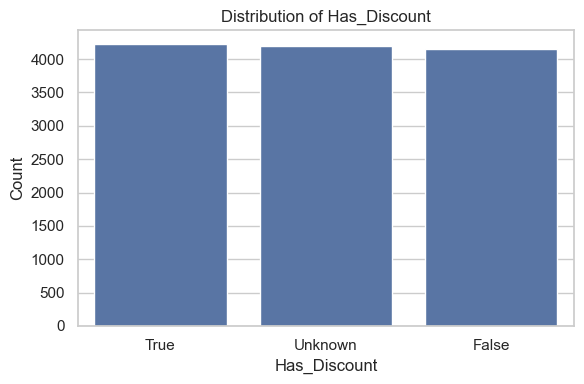

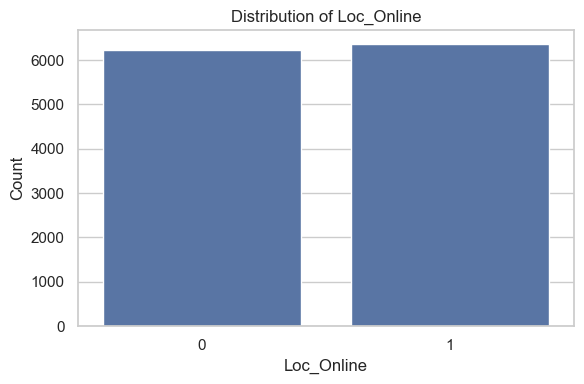

In [29]:
bool_cols = ['Is_Weekend', 'Has_Discount', 'Loc_Online']

for col in bool_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

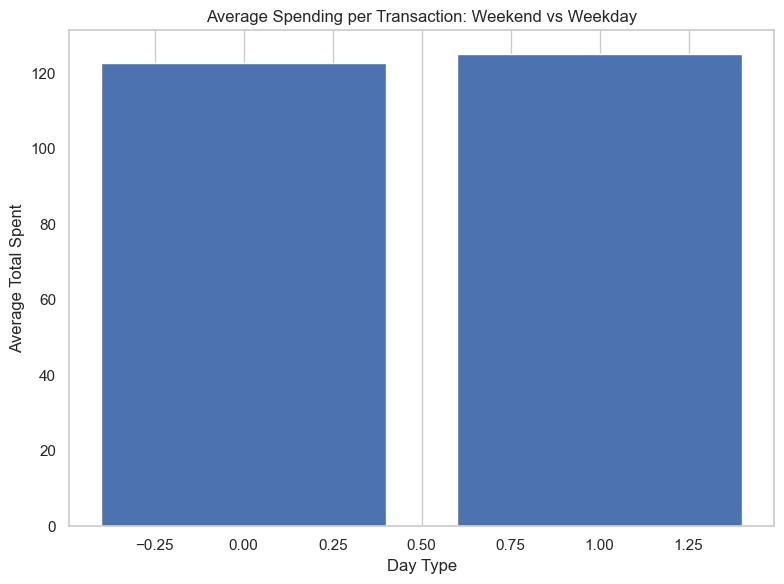

In [39]:
avg_spent_by_weekend = df.groupby('Is_Weekend')['Total Spent'].mean().reset_index()

# 替換成更易讀的標籤
#avg_spent_by_weekend['Is_Weekend'] = avg_spent_by_weekend['Is_Weekend'].map({0: 'Weekday', 1: 'Weekend'})

# 畫出圖表
plt.figure(figsize=(8, 6))
plt.bar(avg_spent_by_weekend['Is_Weekend'], avg_spent_by_weekend['Total Spent'])
plt.title('Average Spending per Transaction: Weekend vs Weekday')
plt.xlabel('Day Type')
plt.ylabel('Average Total Spent')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


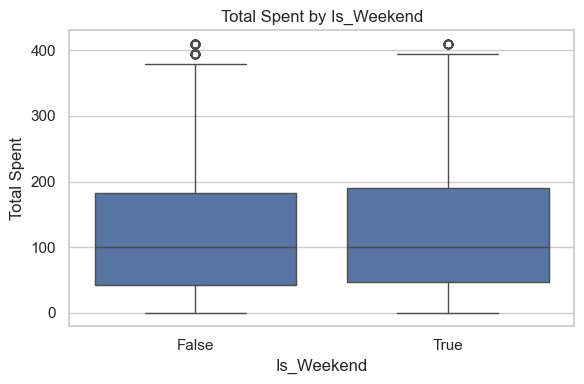

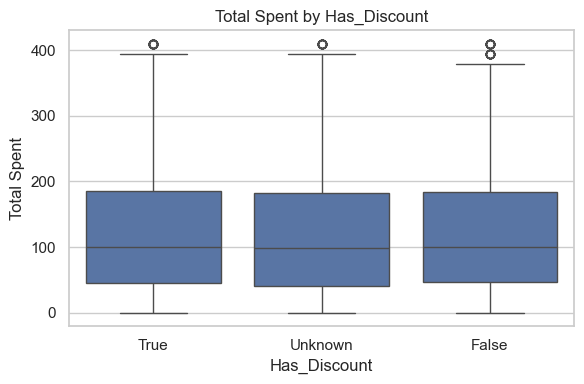

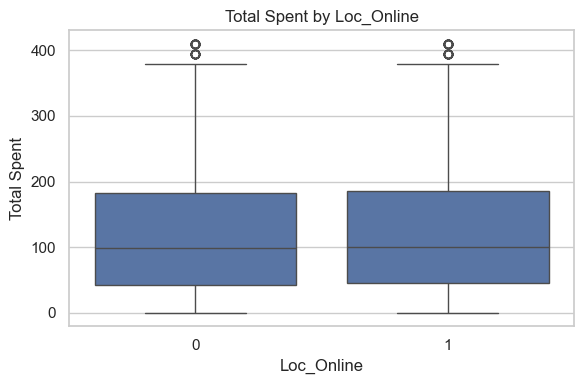

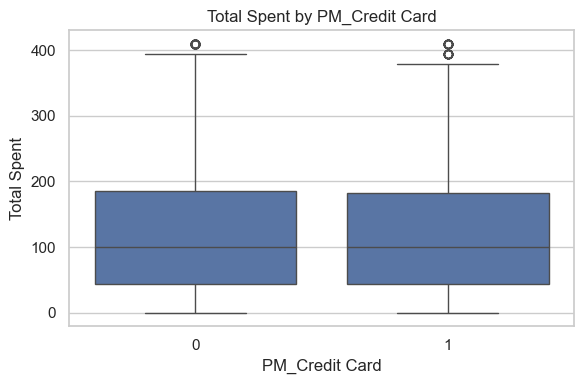

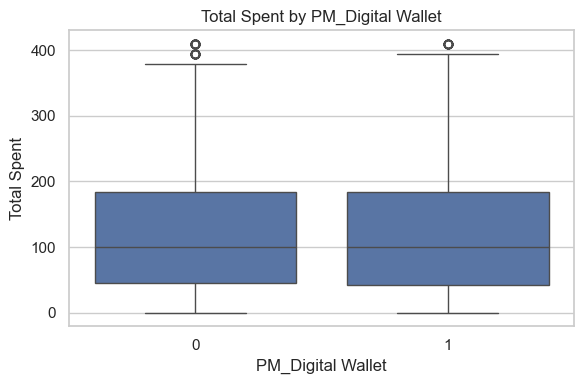

In [28]:
for col in bool_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='Total Spent')
    plt.title(f'Total Spent by {col}')
    plt.xlabel(col)
    plt.ylabel('Total Spent')
    plt.tight_layout()
    plt.show()

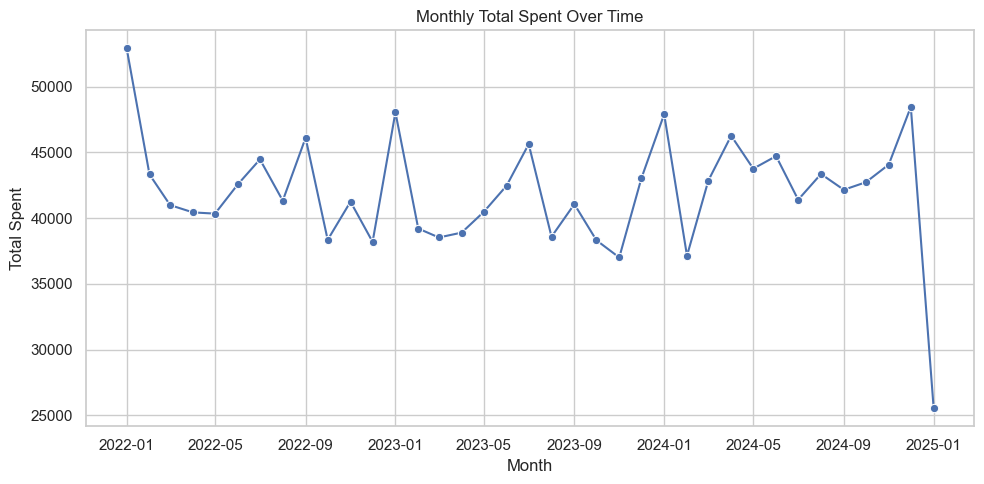

In [13]:
# 確保日期是 datetime 格式
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# 依月份統計總支出
monthly_trend = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().reset_index()
monthly_trend['Transaction Date'] = monthly_trend['Transaction Date'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='Transaction Date', y='Total Spent', marker='o')
plt.title('Monthly Total Spent Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spent')
plt.tight_layout()
plt.show()


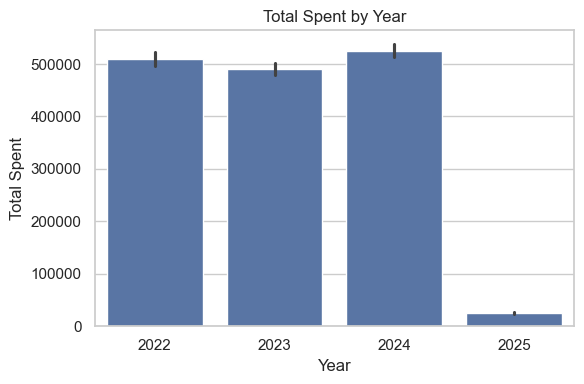

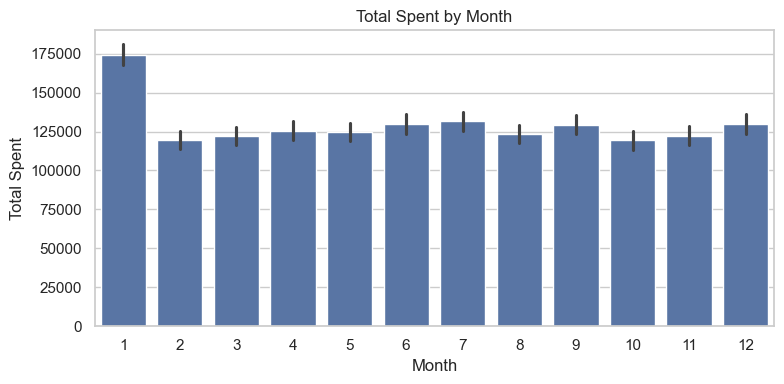

In [27]:
# 年統計
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Year', y='Total Spent', estimator='sum')
plt.title('Total Spent by Year')
plt.tight_layout()
plt.show()

# 月統計
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Month', y='Total Spent', estimator='sum')
plt.title('Total Spent by Month')
plt.tight_layout()
plt.show()


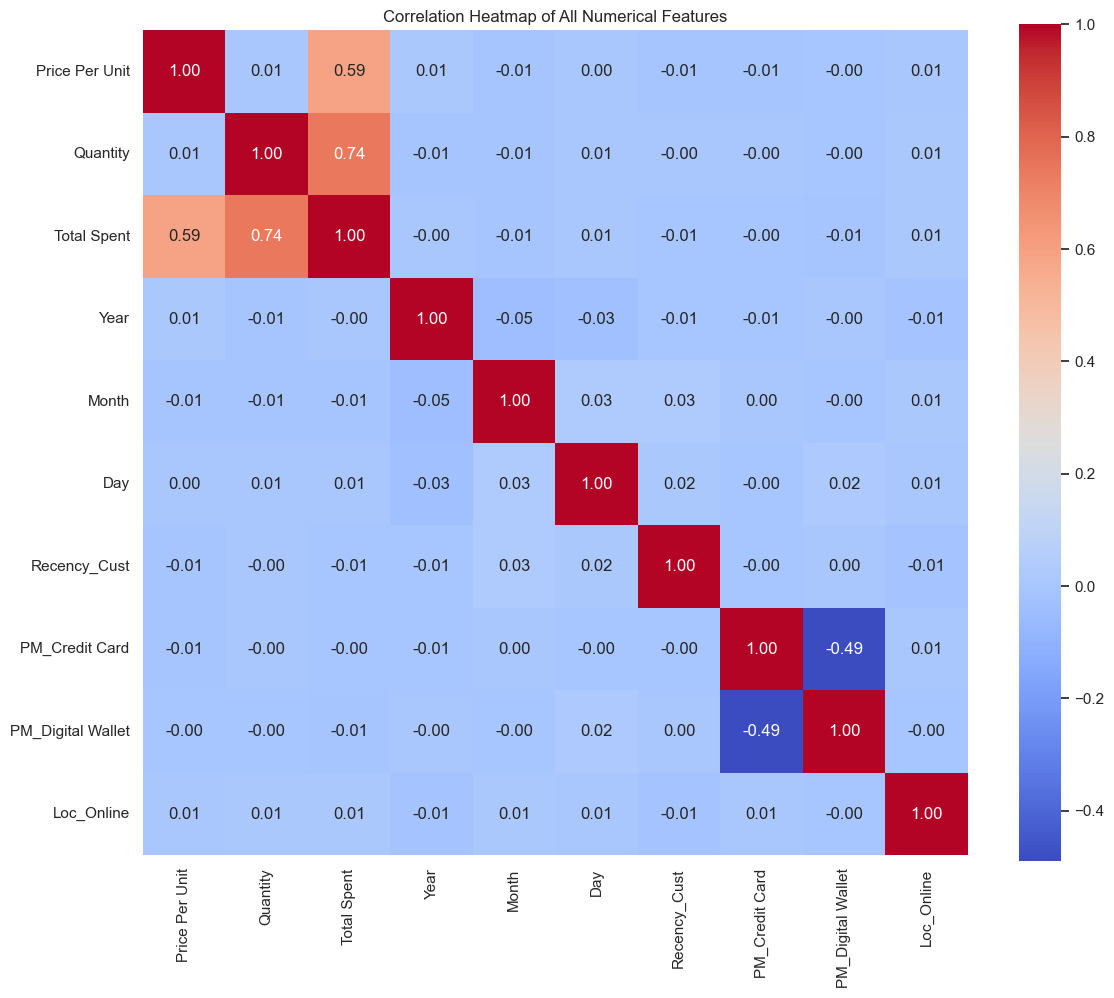

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 選取所有數值型欄位
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 計算相關係數矩陣
corr_matrix_all = numeric_df.corr()

# 繪製熱力圖
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of All Numerical Features')
plt.tight_layout()
plt.show()
